In [65]:
import pandas as pd
import numpy as np

In [66]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
students_perfomance = pd.read_csv('data/StudentsPerformance.csv')

In [68]:
students_perfomance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [69]:
students_perfomance = students_perfomance.rename(columns= {
 'parental level of education': 'parental_level_of_education',
 'test preparation course': 'test_preparation_course',
 'math score': 'math_score',
 'reading score': 'reading_score',
 'writing score': 'writing_score'})

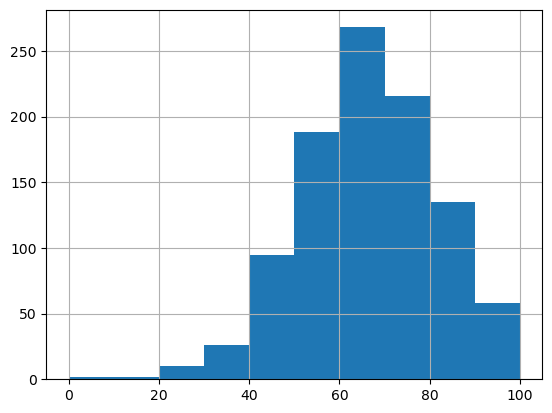

In [70]:
students_perfomance.math_score.hist();

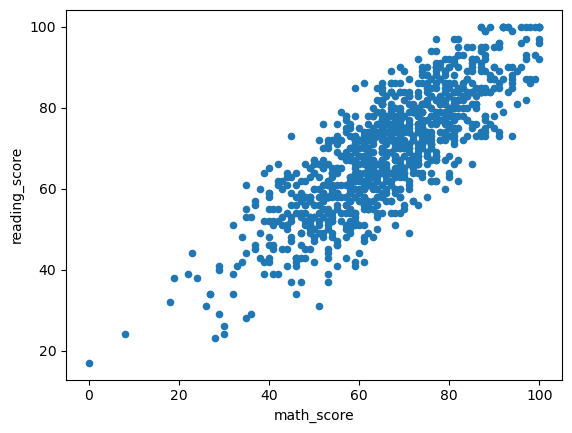

In [71]:
students_perfomance.plot.scatter(x='math_score', y='reading_score');

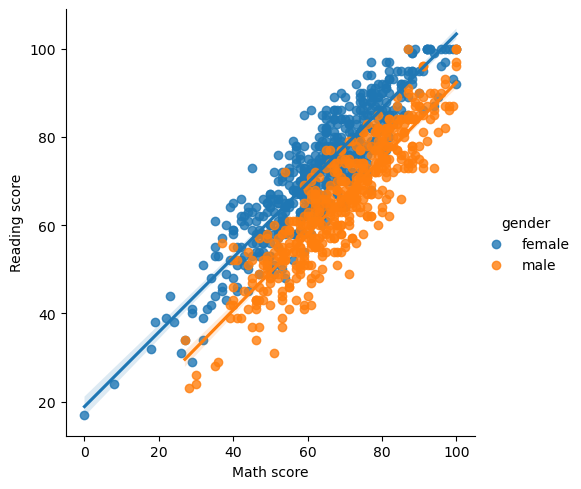

In [72]:
ax = sns.lmplot(x='math_score', y='reading_score', hue='gender', data=students_perfomance)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score');

In [73]:
df = pd.read_csv('data/income.csv')
df.head()

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


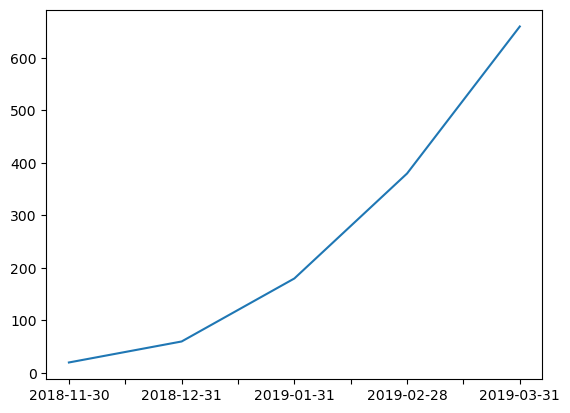

In [74]:
# df['income'].plot()
# plt.plot(df.index, df.income)
# df.plot()
# df.plot(kind='line')
# sns.lineplot(data=df)
# sns.lineplot(x=df.index, y=df.income)
df.income.plot();

In [75]:
df = pd.read_csv('data/genome_matrix.csv', index_col=0)
df.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


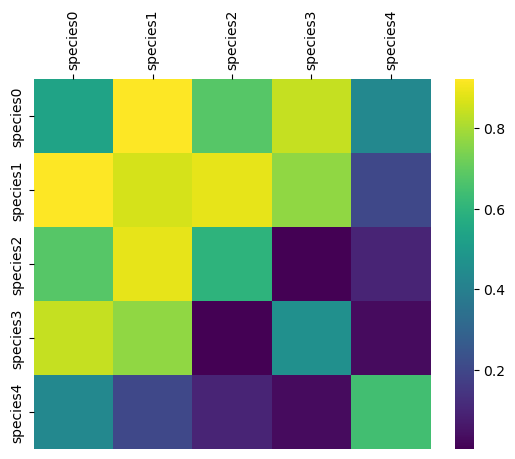

In [76]:
g = sns.heatmap(data=df, cmap='viridis')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90);

In [77]:
df_dota = pd.read_csv('data/dota_hero_stats.csv', index_col=0)
df_dota.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [78]:
lenths = [len(r.split(',')) for r in df_dota.roles]
df_dota['lenths'] = lenths
df_dota.lenths.mode()

0    4
Name: lenths, dtype: int64

In [79]:
df_dota.roles.str.split(',').apply(len).mode()

0    4
Name: roles, dtype: int64

c:\Users\kuche\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


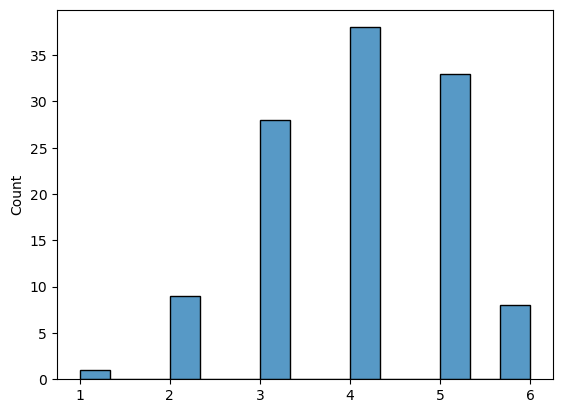

In [80]:
sns.histplot([x.count(',')+1 for x in df_dota.roles], bins=15);

In [81]:
df_dota.roles.map(eval).map(len).mode()

0    4
Name: roles, dtype: int64

C:\Users\kuche\AppData\Local\Temp\ipykernel_3160\78550631.py:1: FutureWarning: using <function <lambda> at 0x0000023879944C20> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  df_dota['roles'].agg(lambda x: len(x.split(','))).hist();


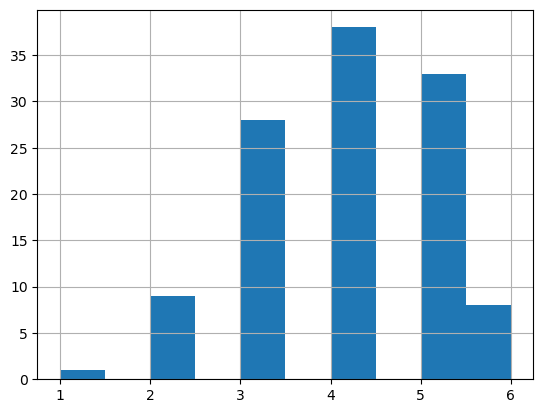

In [82]:
df_dota['roles'].agg(lambda x: len(x.split(','))).hist();

In [83]:
df_iris = pd.read_csv('data/iris.csv', index_col=0)
df_iris

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


c:\Users\kuche\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kuche\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\kuche\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\kuche\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

<Axes: ylabel='Density'>

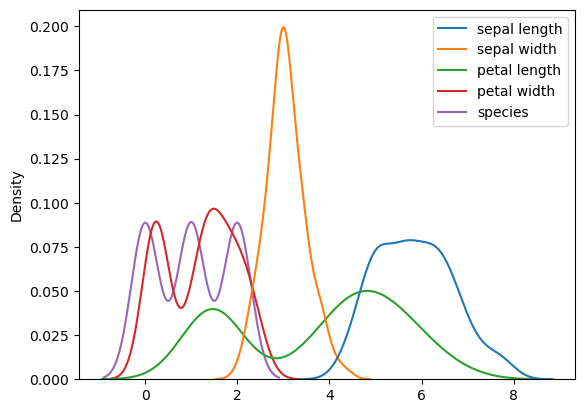

In [84]:
sns.kdeplot(data=df_iris)

In [85]:
# for column in df_iris:
#     sns.displot(data=df_iris[column])

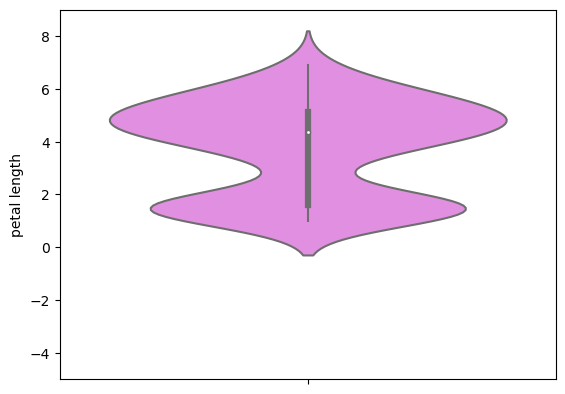

In [86]:
sns.violinplot(data=df_iris, y='petal length', color='violet')
plt.ylim(-5, 9)
plt.show()

c:\Users\kuche\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kuche\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\kuche\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kuche\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

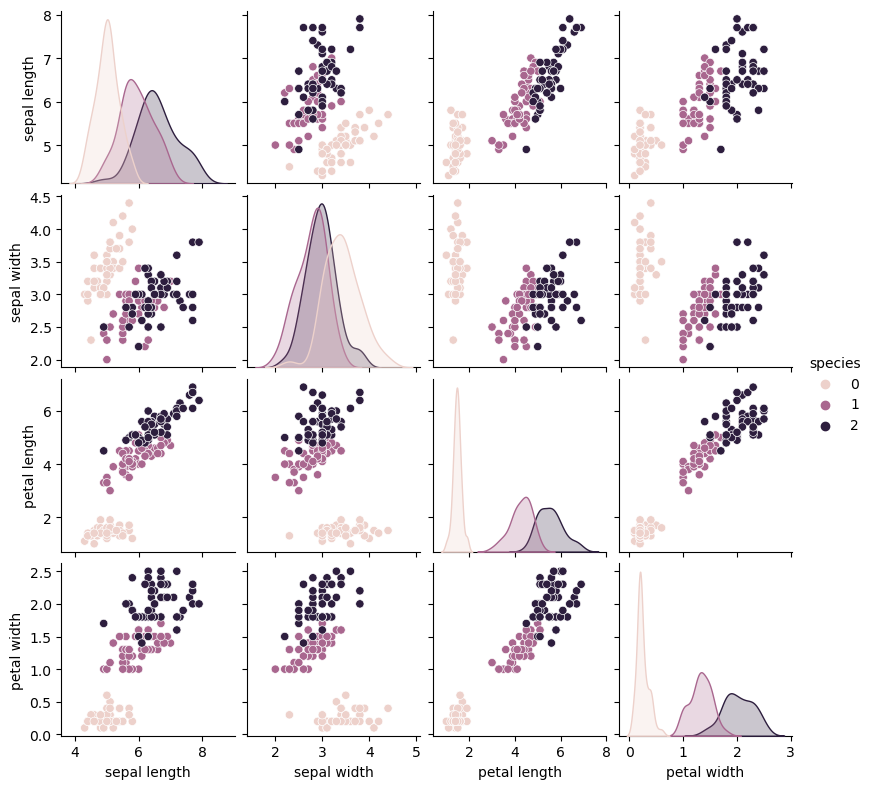

In [87]:
sns.pairplot(df_iris, hue="species", height=2)

<Axes: >

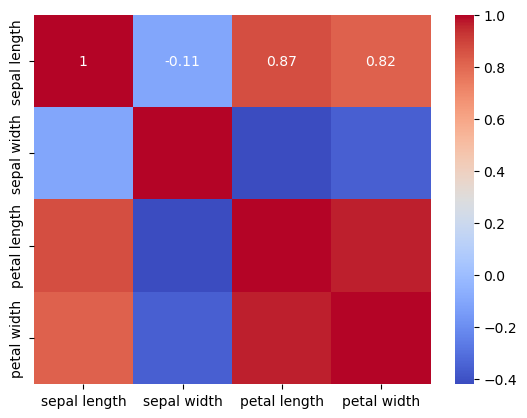

In [88]:
sns.heatmap(df_iris.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')

In [89]:
my_data = pd.DataFrame({'type' : ['A', 'A', 'B', 'B'], 'value' : [10, 14, 12, 23]})
my_data = pd.DataFrame({'type': list('AABB'), 'value': [10, 14, 12, 23]})
my_data = pd.DataFrame([['A', 10],['A',14],['B',12],['B', 23]], columns=['type','value'])
my_data

,type,value
0,A,10
1,A,14
2,B,12
3,B,23


In [90]:
my_stat = pd.read_csv('data/my_stat.csv')
my_stat.head()

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0


In [91]:
subset_1 = my_stat.iloc[0:10, [0, 2]]
subset_1

,V1,V3
0,2,B
1,-1,B
2,0,A
3,2,A
4,0,B
5,2,A
6,0,A
7,1,A
8,0,B
9,-1,A


In [92]:
# %timeit subset_2 = my_stat.iloc[:, [1, 3]][~my_stat.index.isin([0, 4])]
# %timeit subset_2 = my_stat.iloc[~my_stat.index.isin([0, 4]), [1, 3]]
# %timeit subset_2 = my_stat.iloc[:, [1, 3]].drop([0, 4], axis=0)



In [93]:
subset_2 = my_stat.iloc[:, [1, 3]][~my_stat.index.isin([0, 4])]
subset_2.head()

,V2,V4
1,7.0,1.0
2,11.0,0.0
3,11.0,2.0
5,11.0,0.0
6,9.0,2.0


In [94]:
subset_1 = my_stat.query("(V1 > 0) & (V3 == 'A')")
subset_1.head()

,V1,V2,V3,V4
3,2,11.0,A,2.0
5,2,11.0,A,0.0
7,1,9.0,A,1.0
10,1,10.0,A,1.0
13,1,12.0,A,3.0


In [95]:
subset_2 = my_stat.query("(V2 != 10) | (V4 >= 1)")
subset_2.head()

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0


In [96]:
# %timeit subset_1 = my_stat[(my_stat['V1'] > 0) & (my_stat['V3'] == 'A')]
# %timeit subset_1 = my_stat.query("(V1 > 0) and (V3 == 'A')" )
# %timeit subset_2 = my_stat[(my_stat['V2'] != 10) | (my_stat['V4'] >= 1)]
# %timeit subset_2 = my_stat.query("(V1 > 0) and (V3 == 'A')" )

In [97]:
my_stat['V5'] = my_stat['V1'] + my_stat['V4']
my_stat['V6'] = np.log(my_stat['V2'])
my_stat.head()

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585


In [98]:
my_stat=my_stat.assign(V5 = my_stat.V1 + my_stat.V4, V6 = np.log(my_stat.V2));

In [99]:
my_stat = my_stat.rename(columns={
    'V1' : 'session_value',
    'V2' : 'group',
    'V3' : 'time',
    'V4' : 'n_users'
    })

In [100]:
# %timeit my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
# %timeit my_stat.columns = ['session_value','group','time','n_users']
# %timeit my_stat.rename(columns={'V1': 'session_value', 'V2': 'group', 'V3': 'time', 'V4': 'n_users'}, inplace=True)

In [101]:
my_stat.head()

,session_value,group,time,n_users,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585


In [102]:
my_stat = pd.read_csv('data/my_stat_1.csv')

In [103]:
my_stat.head()

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


In [104]:
my_stat.fillna(0, inplace=True)

In [105]:
my_stat.loc[my_stat['n_users'] < 0, 'n_users'] = my_stat.query('n_users >= 0')['n_users'].median()

In [106]:
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,5
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,0.0,11,B,5
7,0.0,9,A,4
8,0.0,8,B,5
9,0.0,9,A,5


In [107]:
my_stat = pd.read_csv('data/my_stat_1.csv')
%timeit my_stat.n_users = my_stat.n_users.apply(lambda x: x if x >= 0 else my_stat.n_users[my_stat.n_users >= 0].median())

# my_stat = pd.read_csv('data/my_stat_1.csv') # возвращаем my_stat в исходное состояние
# %timeit my_stat.n_users.where(my_stat.n_users >= 0, my_stat.n_users[my_stat.n_users >= 0].median(), inplace=True)

# my_stat = pd.read_csv('data/my_stat_1.csv') # возвращаем my_stat в исходное состояние
# %timeit my_stat.loc[my_stat.n_users < 0, 'n_users'] = my_stat[my_stat.n_users >= 0].n_users.median()

# my_stat = pd.read_csv('data/my_stat_1.csv') # возвращаем my_stat в исходное состояние
# %timeit my_stat.loc[my_stat.n_users < 0, 'n_users'] = my_stat.query('n_users >= 0').n_users.median()

113 µs ± 2.24 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [108]:
my_stat = pd.read_csv('data/my_stat_1.csv')
my_stat.session_value = my_stat.session_value.apply(lambda x: x if x >= 0 else 0)
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,0.0,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [109]:
my_stat = pd.read_csv('data/my_stat_1.csv')
mean_session_value_data = my_stat.groupby('group', as_index=False).agg({'session_value' : 'mean'}).rename(columns={'session_value' : 'mean_session_value'})
mean_session_value_data

,group,mean_session_value
0,A,1.0
1,B,1.0


In [110]:
my_stat = pd.read_csv('data/my_stat_1.csv')
mean_session_value_data = my_stat.groupby("group",as_index=False).session_value.agg({'mean_session_value':'mean'})
mean_session_value_data

C:\Users\kuche\AppData\Local\Temp\ipykernel_3160\2453625808.py:2: FutureWarning: Passing a dictionary to SeriesGroupBy.agg is deprecated and will raise in a future version of pandas. Pass a list of aggregations instead.
  mean_session_value_data = my_stat.groupby("group",as_index=False).session_value.agg({'mean_session_value':'mean'})


,group,mean_session_value
0,A,1.0
1,B,1.0


In [111]:
df = pd.read_csv("data\dataset_209770_6.txt", sep = ' ')

<Axes: xlabel='x', ylabel='y'>

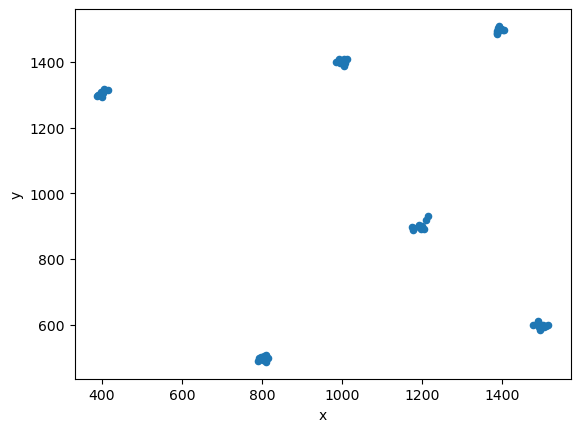

In [112]:
df.plot.scatter(x = 'x', y = 'y')

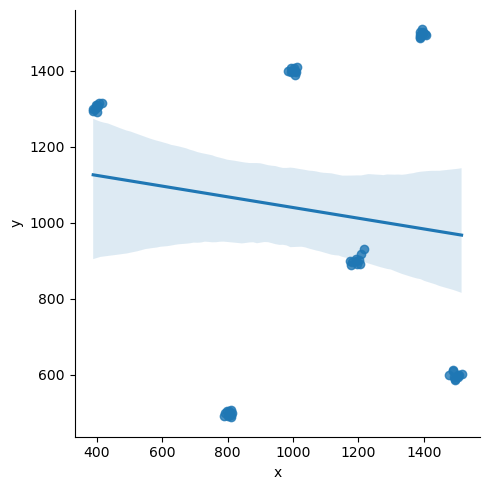

In [118]:
sns.lmplot(x='x', y='y', data=df)